In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb  #the model that we have to use

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Hourly_energy_consumption_forecasting/PJME_hourly.csv')
df = df.set_index('Datetime')  #set datetime as index bcs we will divide data by date
df.index = pd.to_datetime(df.index) # this made df.index as datetime, so it will make the x_axis of plot readable
df.tail()

,PJME_MW
Datetime,
2018-01-01 20:00:00,44284.0
2018-01-01 21:00:00,43751.0
2018-01-01 22:00:00,42402.0
2018-01-01 23:00:00,40164.0
2018-01-02 00:00:00,38608.0


#plot the data to snalyze

<Axes: title={'center': 'Datatime and energy consumtion plot'}, xlabel='Datetime'>

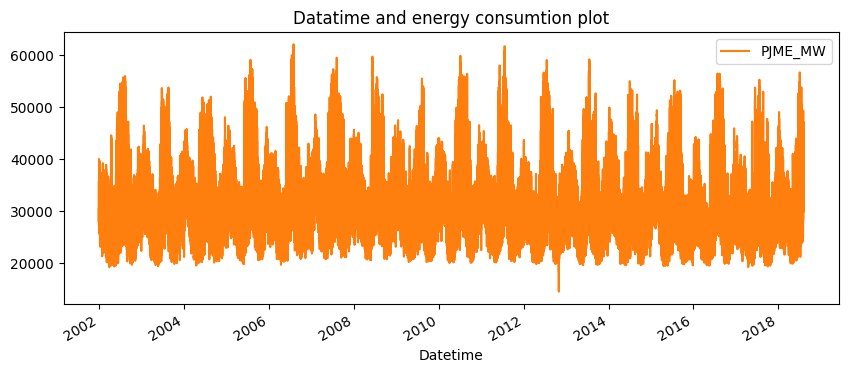

In [3]:
color_pal= sns.color_palette()
df.plot(figsize=(10, 4), color=color_pal[1], title='Datatime and energy consumtion plot')
#THE X index is just object, so we make it as datetime to look readable


##split data for model training and testing


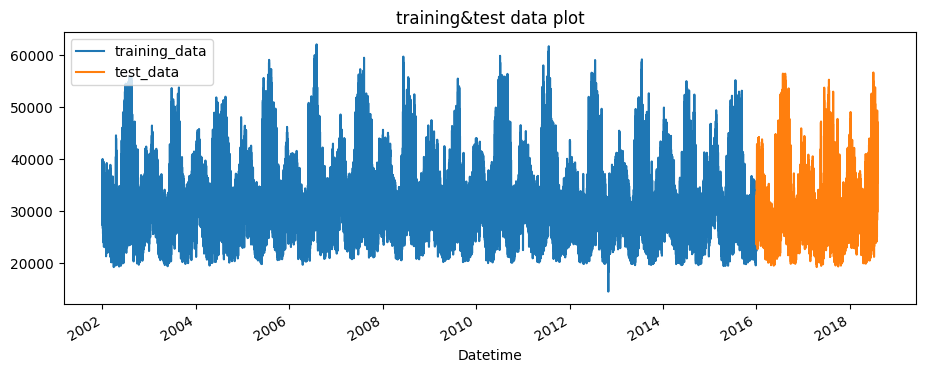

In [4]:
training_data = df.loc[df.index < '2016-01-01']
#training_data.tail()   this can come only at the end
test_data = df.loc[df.index >= '2016-01-01']
#test_data.head()
fig, ax = plt.subplots(figsize=(11, 4))
training_data.plot(ax=ax, title='training&test data plot')
test_data.plot(ax=ax)
#add legends to show which is train and which is test
ax.legend(['training_data', 'test_data'])
plt.show()

## lets see how one single month of data looks like

<Axes: title={'center': 'A Month Data Plot'}, xlabel='Datetime'>

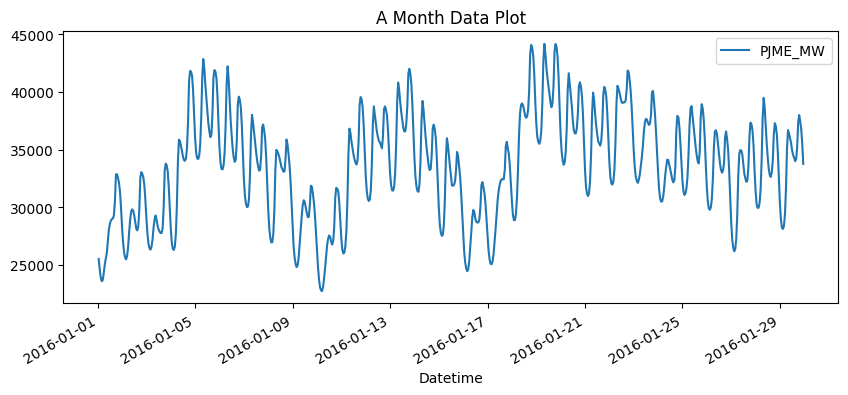

In [5]:
a_month_data = df.loc[(df.index < '2016-01-30') & (df.index > '2016-01-01')]
a_month_data.plot(style='', figsize=(10, 4), title='A Month Data Plot')

##the same way we examine a week of data

<Axes: title={'center': 'A week Data Plot'}, xlabel='Datetime'>

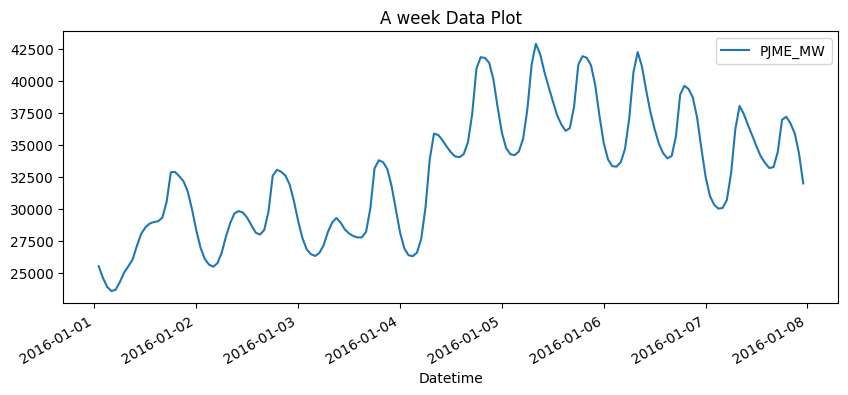

In [6]:
a_week_data = df.loc[(df.index < '2016-01-08') & (df.index > '2016-01-01')]
a_week_data.plot(style='', figsize=(10, 4), title='A week Data Plot')

#Feature Creation
###we create features out of data
###we create features of different index values

In [7]:
def create_features(df):
# this fuction will take a data frame, create features and return df with features
    #first we make a column of hourly data
    df = df.copy() # we are adding a copy so that to make sure when edit it for test and train we edit a copy
    df['hourly'] = df.index.hour
    #df['hourly'].head()
    df['weekly'] = df.index.dayofweek
    df['quarterly'] = df.index.quarter # split a year into 4
    df['monthly'] = df.index.month
    df['yearly'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['weekend'] = (df.index.dayofweek >= 5).astype(int)
    #make all the features a function
    return df

df = create_features(df)  # run this function into the data frame so that featyures are read

#Now Visualize our feature and target relationship

Text(0.5, 1.0, 'Hourly index and output plot')

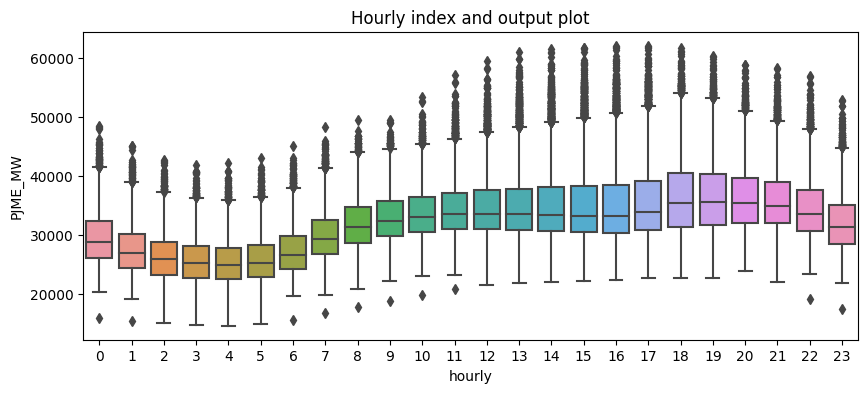

In [8]:
#this is a relationship between individual feature and target
fig, ax = plt.subplots(figsize=(10, 4))
sns.boxplot(data=df, x='hourly', y='PJME_MW')
ax.set_title('Hourly index and output plot')

Text(0.5, 1.0, 'monthly index and output plot')

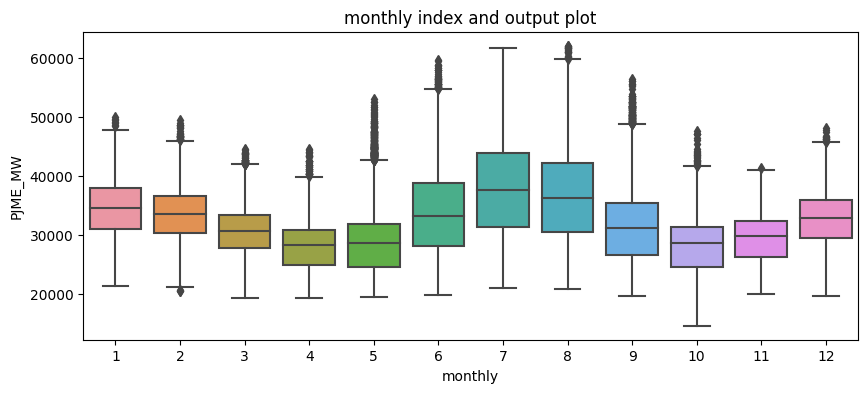

In [9]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.boxplot(data=df, x='monthly', y='PJME_MW')
ax.set_title('monthly index and output plot')

Text(0.5, 1.0, 'weekly index and output plot')

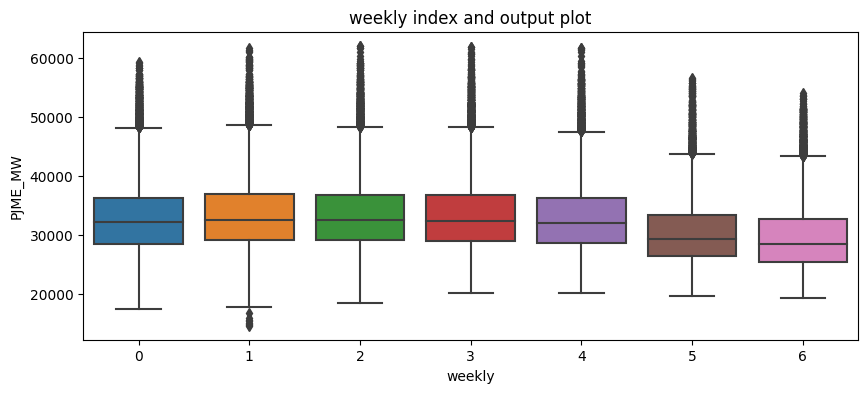

In [10]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.boxplot(data=df, x='weekly', y='PJME_MW')
ax.set_title('weekly index and output plot')

#Now we create our model to apply on data

In [11]:
#reg = xgb.XGBRegressor(n_estimators=1200) #Number of estimators
#before fitting the model into data we first create features for both train and test. we had created features for only df.
# run it through the funtion
training_data = create_features(training_data)
test_data = create_features(test_data)
#we dafine our features and target. done above

In [12]:
# to see features we see the colums
df.columns

Index(['PJME_MW', 'hourly', 'weekly', 'quarterly', 'monthly', 'yearly',
       'dayofyear', 'weekend'],
      dtype='object')

In [13]:
input_features = ['hourly', 'weekly', 'quarterly', 'monthly', 'yearly',
       'dayofyear']
target = ['PJME_MW']

In [14]:
x_train = training_data[input_features]
y_train = training_data[target]
x_test = test_data[input_features]
y_test = test_data[target]

In [ ]:
reg = xgb.XGBRegressor(n_estimators=1200, early_stopping_rounds=70,
                        learning_rate=0.01)                               #Number of estimators
reg.fit(x_train, y_train,
        eval_set=[(x_train, y_train), (x_test, y_test)],
        verbose=100)                                             #we first made werbose as True (to print every reading) then we printed 1 after 100 readings


[0]	validation_0-rmse:6419.51096	validation_1-rmse:6435.35629
[100]	validation_0-rmse:3928.45458	validation_1-rmse:4398.75960
[200]	validation_0-rmse:3259.68128	validation_1-rmse:3998.52623
[300]	validation_0-rmse:3017.45499	validation_1-rmse:3946.56891
[361]	validation_0-rmse:2923.71726	validation_1-rmse:3958.73434


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=70,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

#Applying SVM model on the same data

In [15]:
from sklearn.svm import SVR


# Initialize the SVR model
model = SVR(kernel='linear', C=0.01)

# Fit the model on the training data
model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared (R2) Score: {r2:.2f}')

# Plot the actual vs. predicted values
#plt.figure(figsize=(10, 6))
#plt.scatter(y_test, y_pred)
#plt.xlabel('Actual Energy')
#plt.ylabel('Predicted Energy')
#plt.title('Actual vs. Predicted Energy')
#plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 31974945.91
R-squared (R2) Score: 0.22


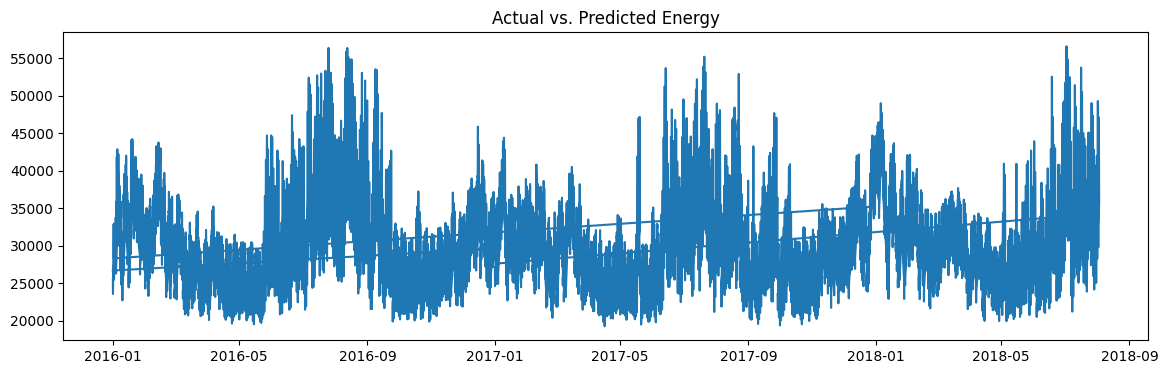

In [ ]:
'''plt.figure(figsize=(14, 4))
#plt.plot(y_pred)
plt.plot(y_test)
plt.title('Actual vs. Predicted Energy')
plt.show()

#for SVM

In [16]:
test_data['predictions'] = model.predict(x_test)

#Feature Importance Analysis

In [ ]:
reg.feature_importances_    # it gives importance value of each feature to build trees

array([0.50649744, 0.16693725, 0.03043192, 0.13409537, 0.02272689,
       0.13931116], dtype=float32)

In [ ]:
f1 = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
                  columns=['importance'])

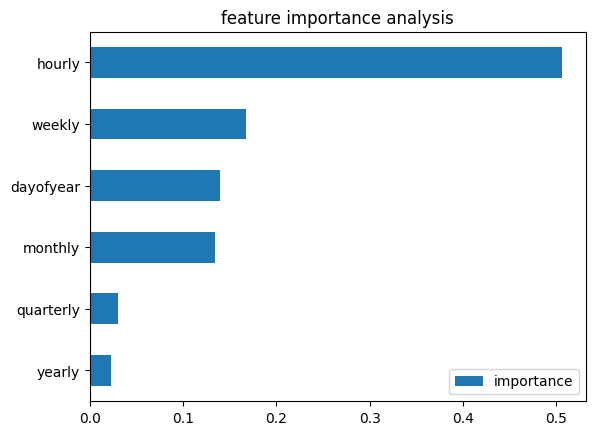

In [ ]:
f1.sort_values('importance').plot(kind='barh', title='feature importance analysis')
plt.show()

#Predicting Future Values

In [ ]:
reg.predict(x_test)

array([32308.826, 26196.02 , 25353.559, ..., 36803.91 , 35485.047,
       32234.035], dtype=float32)

##make a new column for predictions where we store these predictions

In [ ]:
test_data['predictions'] = reg.predict(x_test)
#df = df.merge(test_data, how='left', left_index=True, right_index=True)


In [17]:
df = df.merge(test_data[['predictions']], how='left', left_index=True, right_index=True)

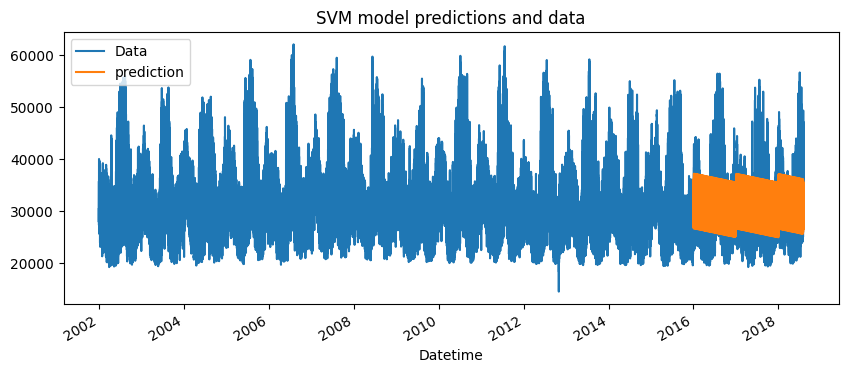

In [20]:
ax = df[['PJME_MW']].plot(figsize=(10, 4))     #the orignal data
df['predictions'].plot(ax=ax) # style='.')       #prediction plot from the test data
ax.set_title('SVM model predictions and data')
plt.legend(['Data', 'prediction'])
plt.show()

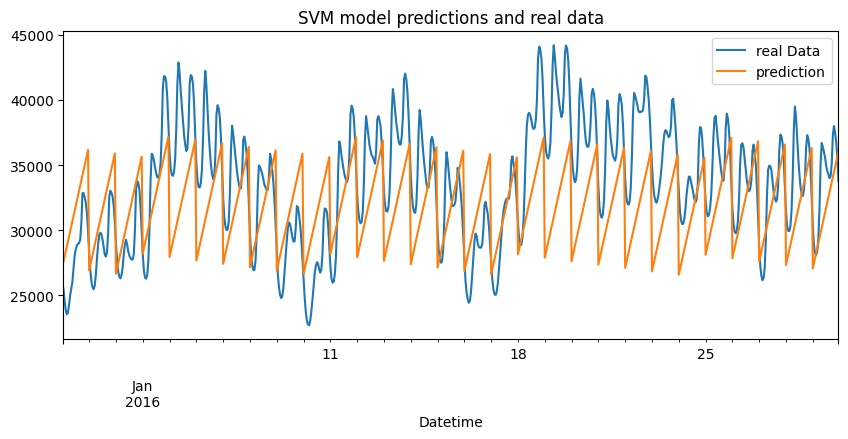

In [21]:
ax = df.loc[(df.index < '2016-01-30') & (df.index > '2016-01-01')][['PJME_MW']].plot(figsize=(10, 4))     #the orignal data
df.loc[(df.index < '2016-01-30') & (df.index > '2016-01-01')]['predictions'].plot(ax=ax) # style='.')       #prediction plot from the test data
ax.set_title('SVM model predictions and real data')
plt.legend(['real Data', 'prediction'])
plt.show()


In [ ]:
score = np.sqrt(mean_squared_error(test_data['PJME_MW'], test_data['predictions'])) #we took square root of mean squared error
#which gives root mean squared arror which we used above
print(f' RMSE= {score:0.3f}')

 RMSE= 3944.538


#Error Calculation

In [ ]:
#test_data.reset_index(drop=True, inplace=True)
test_data['error'] = np.abs(test_data['PJME_MW'] - test_data['predictions'])

#df = df.merge(test_data['error'], how='left', left_index=True, right_index=True)
#df.head()

In [ ]:
test_data['date'] = test_data.index.date

In [ ]:
test_data.groupby('date')['error'].mean()

date
2016-01-01    6541.183512
2016-01-02    3903.116455
2016-01-03    3156.881104
2016-01-04    2180.304199
2016-01-05    2523.604736
                 ...     
2018-07-30    4133.882487
2018-07-31    2664.278402
2018-08-01    2027.429932
2018-08-02    2547.909912
2018-08-03    2822.181641
Name: error, Length: 946, dtype: float64

##Now if i wanna sort values for the best and worst predictions

In [ ]:
test_data.groupby('date')['error'].mean().sort_values(ascending=False).head() # This is for worst predicted days

date
2016-08-13    12329.223633
2016-08-14    11951.425537
2016-09-10    10921.826497
2017-12-31    10891.579102
2016-09-09    10479.202718
Name: error, dtype: float64

In [ ]:
test_data.groupby('date')['error'].mean().sort_values(ascending=True).head() # This is for best predicted days

date
2017-04-01    522.763265
2016-04-04    536.773193
2016-01-12    552.335205
2016-10-27    556.571615
2016-11-27    564.587809
Name: error, dtype: float64

In [ ]:
# Calculate R-squared (R2) score
r2 = r2_score(test_data['PJME_MW'], test_data['predictions'])
print(f'R-squared (R2) Score: {r2}')


R-squared (R2) Score:  0.618394
